# reading stock price and calculating return/ex return/var-cov matrix

In [21]:
# 수익률을 loop를 이용하여 계산하기. 이 방법은 비효율적임

import pandas as pd
data=pd.read_excel('data.xlsx')
# alculate the number of days
days=np.size(data,axis=0)
# calculate the number of stocks
stocknum=np.size(data,axis=1)-1

returns=np.zeros((days-1,stocknum))

for i in range(0,days-1):
    for j in range(1,stocknum+1):
        stockreturn= (data.iloc[i+1,j]-data.iloc[i,j])/data.iloc[i,j]
        returns[i,j-1]=stockreturn
     
m=np.mean(returns,axis=0)*250
H=np.cov(returns,rowvar=0)*250
print(m,H)

[0.06118588 0.08489372 0.14574727] [[0.0228708  0.0100982  0.00010885]
 [0.0100982  0.04309222 0.00433674]
 [0.00010885 0.00433674 0.08042189]]


In [11]:
# 주가 data읽고 수익률계산하여 기대수익률 공분산행렬 계산하기

import pandas as pd
data=pd.read_excel('data.xlsx')

# 일자 열 지우기
data=data.drop('일자', axis=1)

#일수익률 계산하기
data=data.pct_change()

#missing values 행 지우기
data=data.dropna()

#연수익률, 공분산행렬 상관계수 행렬 계산하기
m=data.mean(axis=0)*250
H=data.cov()*250
rho=data.corr()

m=m.values  # series를  array로 변환 df.values
H=H.values  # dataframe을  array로 변환 df.values
rho=rho.values  #dataframe을  array로 변환 df.values
print("기대수익률:","\n", m)
print()
print("공분산행렬","\n", H)
print()
print("상관계수행렬","\n", rho)

기대수익률: 
 [0.06118588 0.08489372 0.14574727]

공분산행렬 
 [[0.0228708  0.0100982  0.00010885]
 [0.0100982  0.04309222 0.00433674]
 [0.00010885 0.00433674 0.08042189]]

상관계수행렬 
 [[1.         0.321665   0.00253813]
 [0.321665   1.         0.07366766]
 [0.00253813 0.07366766 1.        ]]


In [4]:
print(m)

[0.06118588 0.08489372 0.14574727]


In [5]:
print(H)

[[0.0228708  0.0100982  0.00010885]
 [0.0100982  0.04309222 0.00433674]
 [0.00010885 0.00433674 0.08042189]]


In [36]:
# 포트폴리오 기대수익률 분산 계산하기

import pandas as pd
data=pd.read_excel('data.xlsx')

# 일자 열 지우기
data=data.drop('일자', axis=1)

#일수익률 계산하기
data=data.pct_change()

#missing values 행 지우기
data=data.dropna()

#연수익률, 공분산행렬 계산하기
m=data.mean(axis=0)*250
H=data.cov()*250

m=m.values  # series를  array로 변환 df.values
H=H.values  # dataframe을  array로 변환 df.values

#  투자가중치 벡터
w=np.array([0.2,0.3,0.5])

#포트폴리의 기대수익률과 분산/표준편차 계산
ER=np.sum(w*m)
var=w.dot(H).dot(w.T)
std=np.sqrt(var)

print("기대수익률:"); print(format(ER,".4f"));
print("분산:");print(format(var,".4f"));
print("표준편차:");print(format(std,".4f"))


기대수익률:
0.1106
분산:
0.0274
표준편차:
0.1656


In [28]:
m1

array([0.06118588, 0.08489372, 0.14574727])

In [27]:
H1

array([[0.0228708 , 0.0100982 , 0.00010885],
       [0.0100982 , 0.04309222, 0.00433674],
       [0.00010885, 0.00433674, 0.08042189]])

# 주가 및 이동평균선

In [1]:
import pandas as pd
주가자료=pd.read_excel('data.xlsx')
주가자료=주가자료.set_index('일자')
주가자료.head()

,KT,SK텔레콤,현대모비스
일자,,,
2016/01/04,28000,210500,238000
2016/01/05,28200,210000,237000
2016/01/06,28100,208000,234500
2016/01/07,27750,204000,237000
2016/01/08,27750,208000,238500


In [17]:
import pandas as pd
주가자료=pd.read_excel('data.xlsx')
주가자료=주가자료.set_index('일자')
주가자료1=주가자료.rolling(5).mean()
주가자료1.head(10)

,KT,SK텔레콤,현대모비스
일자,,,
2016/01/04,NaN,NaN,NaN
2016/01/05,NaN,NaN,NaN
2016/01/06,NaN,NaN,NaN
2016/01/07,NaN,NaN,NaN
2016/01/08,27960.0,208100.0,237000.0
2016/01/11,27880.0,206600.0,237600.0
2016/01/12,27740.0,205900.0,238500.0
2016/01/13,27650.0,206000.0,241000.0
2016/01/14,27570.0,206900.0,242600.0


In [13]:
%matplotlib tk
import pandas as pd
주가자료=pd.read_excel('data.xlsx')
주가자료=주가자료.set_index('일자')

주가자료1=주가자료.rolling(20).mean()

주가자료1.rename(columns={"KT":"KT이동평균", "SK텔레콤":"SK텔레콤이동평균",\
                      "현대모비스":"현대모비스이동평균" },inplace=True)
통합자료=pd.concat([주가자료, 주가자료1],axis=1)
통합자료.dropna(inplace=True)

통합자료[['현대모비스','현대모비스이동평균']].plot( title= "주가와 20일이동평균주가",\
                                 legend=True,figsize=(8,5))

In [9]:
import pandas as pd
주가자료=pd.read_excel('data.xlsx')
주가자료=주가자료.set_index('일자')

#한글 폰트 사용
from matplotlib import font_manager,rc
import matplotlib
import matplotlib.pyplot as plt
#폰트 경로
font_path = "C:/Windows/Fonts/HMKMRHD.TTF"
#폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()
#font 설정
matplotlib.rc('font',family=font_name)

주가자료1=주가자료.rolling(20).mean()

주가자료1.rename(columns={"KT":"KT이동평균", "SK텔레콤":"SK텔레콤이동평균","현대모비스":"현대모비스이동평균" },inplace=True)
통합자료=pd.concat([주가자료, 주가자료1],axis=1)
통합자료.dropna(inplace=True)

%matplotlib tk
통합자료[['현대모비스','현대모비스이동평균']].plot( title= "주가와 20일이동평균주가",legend=True,figsize=(8,5))

# MACD

In [46]:
import pandas as pd
주가자료=pd.read_excel('data.xlsx')
주가자료=주가자료.set_index('일자')

주가자료["SK텔레콤10일이동평균"]=주가자료["SK텔레콤"].rolling(10).mean()
주가자료["SK텔레콤30일이동평균"]=주가자료["SK텔레콤"].rolling(30).mean()
주가자료.dropna(inplace=True)

주가자료['MACD']=주가자료["SK텔레콤10일이동평균"]-주가자료["SK텔레콤30일이동평균"]
주가자료['signal']=주가자료['MACD'].rolling(10).mean()
주가자료.dropna(inplace=True)

%matplotlib tk
주가자료[['MACD','signal']].plot( title= "MACD와 signal line",legend=True,figsize=(8,5))

In [45]:
%matplotlib tk
주가자료['SK텔레콤'].plot( title= "주가",legend=True,figsize=(8,5))

# Bollinger band

In [9]:
import pandas as pd
주가자료=pd.read_excel('data.xlsx')
주가자료=주가자료.set_index('일자')

주가자료["SK텔레콤20일이동평균"]=주가자료["SK텔레콤"].rolling(20).mean()
주가자료["SK텔레콤20일이동변동성"]=주가자료["SK텔레콤"].rolling(20).std()
주가자료.dropna(inplace=True)

주가자료['상한']=주가자료["SK텔레콤20일이동평균"]+1.5*주가자료["SK텔레콤20일이동변동성"]
주가자료['하한']=주가자료["SK텔레콤20일이동평균"]-1.5*주가자료["SK텔레콤20일이동변동성"]

#한글 폰트 사용
from matplotlib import font_manager,rc
import matplotlib
import matplotlib.pyplot as plt
#폰트 경로
font_path = "C:/Windows/Fonts/HMKMRHD.TTF"
#폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()
#font 설정
matplotlib.rc('font',family=font_name)

%matplotlib tk
주가자료[["SK텔레콤",'SK텔레콤20일이동평균','상한','하한']].plot( title= "Bollinger band",legend=True,figsize=(8,5))

# stochastics

In [14]:
import pandas as pd
주가자료=pd.read_excel('data.xlsx')
주가자료=주가자료.set_index('일자')

주가자료["%K"]=(주가자료["SK텔레콤"]-주가자료["SK텔레콤"].rolling(14).min())\
/(주가자료["SK텔레콤"].rolling(14).max()-주가자료["SK텔레콤"].rolling(14).min())*100
주가자료.dropna(inplace=True)
주가자료["%D"]=주가자료["%K"].rolling(3).mean()
주가자료.dropna(inplace=True)

주가자료["slow%K"]=주가자료["%K"].rolling(3).mean()
주가자료.dropna(inplace=True)
주가자료["slow%D"]=주가자료["slow%K"].rolling(3).mean()
주가자료.dropna(inplace=True)

%matplotlib tk
주가자료[['slow%K','slow%D']].plot( title= "Slow Stochatics",legend=True,figsize=(15,5))

In [18]:
주가자료['SK텔레콤'].plot( title= "SKTELECOM",legend=True,figsize=(15,5))

# portfolio mean and variance

In [58]:
import numpy as np

#  주식의 기대수익률 벡터화 분산-공분산 행렬

m=np.array([0.06, 0.08])
H=np.array([[0.1 , 0.01 ], [0.01 ,0.3]])

#  투자가중치 벡터
w=np.array([0.1,0.9])

#포트폴리의 기대수익률과 분산/표준편차 계산
ER=np.sum(w*m)
var=w.dot(H).dot(w.T)
std=np.sqrt(var)

print("기대수익률:",format(ER,".4f"))
print("분산:", format(var,".4f"))
print("표준편차:", format(std,".4f"))

기대수익률: 0.0780
분산: 0.2458
표준편차: 0.4958


In [59]:
#  포트폴리의 기대수익률과 분산/표준편차 계산을 위한 파일

import numpy as np

#  주식의 기대수익률 벡터화 분산-공분산 행렬

m=np.array([0.06, 0.08,0.1, 0.15])
H=np.array([[0.1 , 0.01 , 0.03, 0.05], [0.01 ,0.3, 0.06 ,-0.04], 
    [0.03, 0.06 , 0.4 , 0.02],[0.05 , -0.04 , 0.02  ,0.5]])

#  투자가중치 벡터
w=np.array([0.2,0.3,0.4,0.1])

#포트폴리의 기대수익률과 분산/표준편차 계산
ER=np.sum(w*m)
var=w.dot(H).dot(w.T)
std=np.sqrt(var)

print("기대수익률:",format(ER,".4f"))
print("분산:", format(var,".4f"))
print("표준편차:", format(std,".4f"))

기대수익률: 0.0910
분산: 0.1216
표준편차: 0.3487


In [60]:
m=np.array([0.06, 0.08,0.1, 0.15])
H=np.array([[0.1 , 0.01 , 0.03, 0.05], [0.01 ,0.3, 0.06 ,-0.04], 
    [0.03, 0.06 , 0.4 , 0.02],[0.05 , -0.04 , 0.02  ,0.5]])
w=np.array([0.2,0.3,0.4,0.1])

ER=np.sum(w*m);  var=w.dot(H).dot(w.T); std=np.sqrt(var)
print("기대수익률;"); print(ER);
print("분산;");print(var);
print("표준편차;");print(std)

기대수익률;
0.09100000000000001
분산;
0.12160000000000001
표준편차;
0.3487119154832539


# combination line of 2 stocks

In [2]:
#  2 주식으로 이루어진 조합선(combination line) 탐색을 위한 파일
import numpy as np

m=np.array([0.06 , 0.08]) # 기대수익률 벡터
H=np.array([[0.1 ,0.01], [0.01,0.3]]) #분산공분산행렬

# L개 포트폴리오의 기대수익률 벡터와 표준편차 벡터를  0 벡터로 사전 지정
L=50
weight=np.linspace(-0.5,1.3,L)  #주식1의 투자가중치 벡터
combiexreturns=np.zeros((L,1)) # L개 포트폴리오 기대수익률 계산을 위한 사전 지정 0벡터
combisigmas=np.zeros((L,1))  # L개 포트폴리오 표준편차 계산을 위한 사전 지정 0벡터

# L개 포트폴리오의 기대수익률 벡터와 표준편차 벡터를  계산하기 위한 for loop

for i in range(0,L):
    weights=np.array([weight[i], 1-weight[i]])
    er=np.sum(weights*m)
    combiexreturns[i]=er # 계산된 포트폴리오 기대수익율로 기대수익률 0 백터 원소를 대체
    var=weights.dot(H).dot(weights.T)
    std=np.sqrt(var)
    combisigmas[i]=std
   

#한글 폰트 사용하여 조합선 그리기

from matplotlib import font_manager,rc
import matplotlib
import matplotlib.pyplot as plt
#폰트 경로
mypath = "C:/Windows/Fonts/HMFMPYUN.TTF" # 폰트는 windows/fonts폴더에서 폰트 속성 확인
#폰트 이름 얻어오기
myfont = font_manager.FontProperties(fname=mypath).get_name()
#font 설정
matplotlib.rc('font',family=myfont)

%matplotlib tk

plt.plot(combisigmas,combiexreturns, color="b", marker="o",markerfacecolor="r",markeredgecolor="r",label="combination line")
plt.xlabel('표준편차');  plt.ylabel('기대수익률'); plt.title("2 주식 조합선")
plt.legend(loc="upper left")

# Efficient portfolio with short sale, 2 stocks

In [51]:
#  2 주식으로 이루어진 효율적 포트폴리오 탐색을 위한 파일

import numpy as np
from scipy.optimize import minimize

m=np.array([0.06, 0.08])
H=np.array([[0.1 , 0.01],[0.01, 0.3]])

# 분산최소화 문제를 풀기 위한 목적함수,제약조건 ,초기 값
var = lambda x : x.dot(H).dot(x.T)                                                                            
cons={'type':'eq', 'fun': lambda x: np.array(  [np.sum(x*m)-0.07,  np.sum(x)-1]) }
x0=[0.25,0.25]

# SLSQP 알고리즘을 이용한 최소화 해 구하기
effport=minimize(var,x0,constraints=cons)['x']
print("기대수익률 7%인 효율적 포트폴리오:", effport)

portvar=effport.dot(H).dot(effport.T)
portstd=np.sqrt(portvar)
print("효율적 포트폴리오의 표준편차;", format(portstd, ".4f"))
portreturn=np.sum(effport*m)
print("효율적 포트폴리오의 기대수익률;",format(portreturn, ".4f"))

기대수익률 7%인 효율적 포트폴리오: [0.5 0.5]
효율적 포트폴리오의 표준편차; 0.3240
효율적 포트폴리오의 기대수익률; 0.0700


# Efficient portfolio with short sale, 4 stocks

In [54]:
#  4 주식으로 이루어진 효율적 포트폴리오 탐색을 위한 파일

import numpy as np
from scipy.optimize import minimize

m=np.array([0.06, 0.05,0.07, 0.08])
H=np.array([[0.4 , 0.03 , 0.02, 0],[0.03, 0.2 , 0.001 , -0.06], 
 [0.02 ,0.001, 0.3 ,0.03],[0 , -0.06 , 0.03  ,0.1]])

var = lambda x : x.dot(H).dot(x.T)                                                                            
cons={'type':'eq', 'fun': lambda x: np.array(  [np.sum(x*m)-0.09,  np.sum(x)-1]) }
x0=[0.25,0.25,0.25,0.25]

effport=minimize(var,x0,constraints=cons)['x']
print("기대수익률 7%인 효율적 포트폴리오:", effport)

portvar=effport.dot(H).dot(effport.T)
portstd=np.sqrt(portvar)
print("효율적 포트폴리오의 표준편차;", format(portstd, ".4f"))
portreturn=np.sum(effport*m)
print("효율적 포트폴리오의 기대수익률;",format(portreturn, ".4f"))

기대수익률 7%인 효율적 포트폴리오: [-0.08875588 -0.29256794  0.05521557  1.32610824]
효율적 포트폴리오의 표준편차; 0.4993
효율적 포트폴리오의 기대수익률; 0.0900


# Efficient frontier with short sale, 2 stocks

[[ 1.49999998 -0.49999998  0.5338539   0.05      ]
 [ 1.44897957 -0.44897957  0.50736351  0.05102041]
 [ 1.39795916 -0.39795916  0.48147047  0.05204082]
 [ 1.34693876 -0.34693876  0.4562765   0.05306122]
 [ 1.29591835 -0.29591835  0.43190394  0.05408163]
 [ 1.24489794 -0.24489794  0.40849985  0.05510204]
 [ 1.19387753 -0.19387753  0.38624032  0.05612245]
 [ 1.14285713 -0.14285713  0.36533462  0.05714286]
 [ 1.09183672 -0.09183672  0.34602821  0.05816327]
 [ 1.04081631 -0.04081631  0.32860311  0.05918367]
 [ 0.98979591  0.01020409  0.31337331  0.06020408]
 [ 0.9387755   0.0612245   0.30067257  0.06122449]
 [ 0.88775509  0.11224491  0.29083244  0.0622449 ]
 [ 0.83673469  0.16326531  0.28415024  0.06326531]
 [ 0.78571428  0.21428572  0.28085147  0.06428571]
 [ 0.73469387  0.26530613  0.28105531  0.06530612]
 [ 0.68367346  0.31632654  0.28475422  0.06632653]
 [ 0.63265306  0.36734694  0.29181533  0.06734694]
 [ 0.58163265  0.41836735  0.30200289  0.06836735]
 [ 0.53061224  0.46938776  0.31

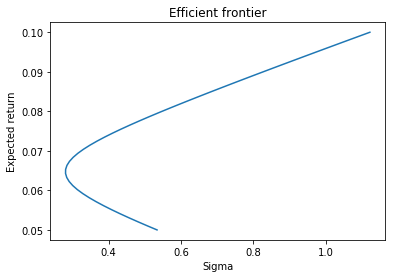

In [8]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pylab as plt

m=np.array([0.06, 0.08])
H=np.array([[0.1 , 0.01 ],[0.01, 0.3]])

L=50;  dim=len(m)
targets=np.linspace(0.05,0.10,L)
weights=np.zeros((L,dim));  exreturns=np.zeros((L,1));  sigmas=np.zeros((L,1))

for i in range(0,L):
    var = lambda x : x.dot(H).dot(x.T)                                                                         
    cons={'type':'eq', 'fun': lambda x: np.array( [np.sum(x*m)-targets[i], x.sum()-1]) }
    x0=[0.5,0.5]
    effport=minimize(var,x0,constraints=cons)['x']
    weights[i,:]=effport
    var=effport.dot(H).dot(effport.T)
    sigmas[i]=np.sqrt(var)
    exreturn=np.sum(effport*m)
    exreturns[i]=exreturn

plt.plot(sigmas,exreturns)
plt.xlabel('Sigma'); plt.ylabel('Expected return'); plt.title("Efficient frontier")

frontier=np.hstack((weights,sigmas,exreturns)); print(frontier)

## combination and frontier; 2 stocks

In [27]:
%matplotlib tk
import matplotlib.pylab as plt
plt.plot(combisigmas,combiexreturns,'r.',sigmas, exreturns,'c.')
plt.xlabel('Sigma'); plt.ylabel('Expected return'); plt.title("Efficient frontier and combination;2 stocks")
plt.ylim(0.04, 0.11)

(0.04, 0.11)

# Efficient frontier with short sale, 4 stocks

In [55]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pylab as plt

m=np.array([0.08, 0.09, 0.1, 0.11])
H=np.array([[0.1 , 0.03 , -0.08, 0.05],[0.03, 0.2 , 0.02 , 0.03], 
 [-0.08 ,0.02, 0.3 ,0.2],[0.05 , 0.03 , 0.2  ,0.9]])

L=50;  dim=len(m)
targets=np.linspace(0.07,0.12,L)
weights=np.zeros((L,dim));  exreturns=np.zeros((L,1));  sigmas=np.zeros((L,1))

for i in range(0,L):
    var = lambda x : x.dot(H).dot(x.T)                                                                         
    cons={'type':'eq', 'fun': lambda x: np.array([ np.sum(x*m)-targets[i],  x.sum()-1]) }
    x0=[0.25,0.25,0.25,0.25]
    effport=minimize(var,x0,constraints=cons)['x']
    weights[i,:]=effport
    var=effport.dot(H).dot(effport.T)
    sigmas[i]=np.sqrt(var)
    exreturn=np.sum(effport*m)
    exreturns[i]=exreturn

plt.plot(sigmas,exreturns);plt.xlabel('Sigma')
plt.ylabel('Expected return'); plt.title("Efficient frontier and envelope")
frontier=np.hstack(( weights, sigmas,exreturns )); print(frontier)

[[ 1.43494417e+00 -2.64235257e-01  2.23638005e-01 -3.94346917e-01
   4.61262981e-01  7.00000000e-02]
 [ 1.38370733e+00 -2.42516502e-01  2.31870208e-01 -3.73061032e-01
   4.36007526e-01  7.10204082e-02]
 [ 1.33247073e+00 -2.20797952e-01  2.40102094e-01 -3.51774867e-01
   4.11101947e-01  7.20408163e-02]
 [ 1.28123438e+00 -1.99079607e-01  2.48333635e-01 -3.30488404e-01
   3.86613867e-01  7.30612245e-02]
 [ 1.22999833e+00 -1.77361518e-01  2.56564768e-01 -3.09201584e-01
   3.62627875e-01  7.40816327e-02]
 [ 1.17876264e+00 -1.55643729e-01  2.64795465e-01 -2.87914373e-01
   3.39250487e-01  7.51020408e-02]
 [ 1.12752736e+00 -1.33926310e-01  2.73025648e-01 -2.66626696e-01
   3.16616539e-01  7.61224490e-02]
 [ 1.07629257e+00 -1.12209342e-01  2.81255252e-01 -2.45338483e-01
   2.94897263e-01  7.71428571e-02]
 [ 1.02505839e+00 -9.04929574e-02  2.89484218e-01 -2.24049649e-01
   2.74310009e-01  7.81632653e-02]
 [ 9.73824925e-01 -6.87772476e-02  2.97712373e-01 -2.02760051e-01
   2.55128965e-01  7.9183

# Global minimum variance portfolio with short sale, 4 stocks

In [11]:
import numpy as np
from scipy.optimize import minimize

m=np.array([0.08, 0.09, 0.1, 0.11])
H=np.array([[0.1 , 0.03 , -0.08, 0.05],[0.03, 0.2 , 0.02 , 0.03], \
 [-0.08 ,0.02, 0.3 ,0.2],[0.05 , 0.03 , 0.2  ,0.9]])

var = lambda x : x.dot(H).dot(x.T)    
cons={'type':'eq', 'fun': lambda x: np.array([x.sum()-1])}

x0=[0.25,0.25,0.25,0.25]

globalminport=minimize(var,x0,constraints=cons)['x']
print("Global variance minimizing portfolio is");print(globalminport)
print()

exreturn=np.sum(globalminport*m);
print("Expected return of global minimum variance is", format(exreturn, ".4f"))

var=globalminport.dot(H).dot(globalminport.T)
std=np.sqrt(var)
print("Sigma of global minimum variance is",format(std, ".4f"))

Global variance minimizing portfolio is
[ 0.66737905  0.06121822  0.34631948 -0.07491675]

Expected return of global minimum variance is 0.0853
Sigma of global minimum variance is 0.1923


# Sharpe portfolio with short sale

In [52]:
import numpy as np
from scipy.optimize import minimize

m=np.array([0.05, 0.1,  0.12,  0.18])
H=np.array([[0.0064,  0.00408,  0.00192,  0], [0.00408,  0.0289,  0.0204,  0.0119],\
  [ 0.00192, 0.02040,   0.0576,  0.0336],  [0,  0.0119,  0.0336,  0.1225]])

rF=0.05; 
sharpe=lambda x: (rF-np.sum(x*m))/np.sqrt(x.dot(H).dot(x.T))
cons={'type':'eq', 'fun': lambda x: np.array([x.sum()-1])}
x0=([0.25,  0.25,  0.25,  0.25])
 
sharpeport=minimize(sharpe,x0,constraints=cons)['x']
print("Sharpe portfolio is", sharpeport)
print()

sharpereturn=np.sum(sharpeport*m)
print("Expected return of Sharpe portfolio is",format(sharpereturn,".4f"))
sharpevar=sharpeport.dot(H).dot(sharpeport.T)
sharpestd=np.sqrt(sharpevar)
print("Sigma of Sharpe portfolio is",format(sharpestd,".4f"))

Sharpe portfolio is [-0.60280858  0.85554871  0.18644126  0.5608186 ]

Expected return of Sharpe portfolio is 0.1787
Sigma of Sharpe portfolio is 0.2904


# Roy portfolio with short sale

In [22]:
import numpy as np
from scipy.optimize import minimize
m=np.array([0.05, 0.1,  0.12,  0.18])
H=np.array([[0.0064,  0.00408,  0.00192,  0], [0.00408,  0.0289,  0.0204,  0.0119],\
  [ 0.00192, 0.02040,   0.0576,  0.0336],  [0,  0.0119,  0.0336,  0.1225]])

rc=0.055; 
roy=lambda x: (rc-np.sum(x*m))/np.sqrt(x.dot(H).dot(x.T))
cons={'type':'eq', 'fun': lambda x: np.array([x.sum()-1])}
x0=([0.25,  0.25,  0.25,  0.25])
 
royport=minimize(roy,x0,constraints=cons)['x']
print("Roy portfolio is", royport)
print()

royreturn=np.sum(royport*m)
print("Expected return of Roy portfolio is",format(royreturn, ".4f"))
royvar=royport.dot(H).dot(royport.T)
roystd=np.sqrt(royvar)
print("Sigma of Roy portfolio is",format(roystd,".4f"))

Roy portfolio is [-2.45522195  1.87242193  0.36128261  1.22151742]

Expected return of Roy portfolio is 0.3277
Sigma of Roy portfolio is 0.6332


# efficient frontier with no short sale, 4 stocks

In [53]:
import numpy as np
from scipy.optimize import minimize, Bounds
import matplotlib.pylab as plt

m=np.array([0.08, 0.09, 0.1, 0.11])
H=np.array([[0.1 , 0.03 , -0.08, 0.05],[0.03, 0.2 , 0.02 , 0.03], 
 [-0.08 ,0.02, 0.3 ,0.2],[0.05 , 0.03 , 0.2  ,0.9]])

L=50;  dim=len(m)
targets=np.linspace(0.08,0.11,L)
weights=np.zeros((L,dim));  exreturns=np.zeros((L,1));  sigmas=np.zeros((L,1))

for i in range(0,L):
    var = lambda x : x.dot(H).dot(x.T)                                                                         
    cons={'type':'eq', 'fun': lambda x: np.array([ np.sum(x*m)-targets[i],  x.sum()-1]) }
    limits=Bounds(np.zeros((dim,1)),np.ones((dim,1))*np.inf)
    x0=[0.25,0.25,0.25,0.25]
    effport=minimize(var,x0,constraints=cons,bounds=limits)['x']
    weights[i,:]=effport
    var=effport.dot(H).dot(effport.T)
    sigmas[i]=np.sqrt(var)
    exreturn=np.sum(effport*m)
    exreturns[i]=exreturn

plt.plot(sigmas,exreturns);plt.xlabel('Sigma')
plt.ylabel('Expected return'); plt.title("Efficient frontier and envelope,no short sale")
frontier=np.hstack((sigmas,exreturns)); print(frontier)

[[0.31622777 0.08      ]
 [0.29917281 0.08061224]
 [0.28294577 0.08122449]
 [0.26769723 0.08183673]
 [0.25360376 0.08244898]
 [0.24086821 0.08306122]
 [0.22971609 0.08367347]
 [0.22025142 0.08428571]
 [0.21258756 0.08489796]
 [0.20692468 0.0855102 ]
 [0.20342996 0.08612245]
 [0.20221584 0.08673469]
 [0.20332318 0.08734694]
 [0.20671467 0.08795918]
 [0.21228087 0.08857143]
 [0.21976323 0.08918367]
 [0.22835189 0.08979592]
 [0.23781684 0.09040816]
 [0.24805457 0.09102041]
 [0.25897501 0.09163265]
 [0.27049611 0.0922449 ]
 [0.28254351 0.09285714]
 [0.29505314 0.09346939]
 [0.30796864 0.09408163]
 [0.32124087 0.09469388]
 [0.33482754 0.09530612]
 [0.34869216 0.09591837]
 [0.36280247 0.09653061]
 [0.37713058 0.09714286]
 [0.3916533  0.0977551 ]
 [0.40634977 0.09836735]
 [0.42149864 0.09897959]
 [0.43809013 0.09959184]
 [0.45605661 0.10020408]
 [0.47524215 0.10081633]
 [0.49550518 0.10142857]
 [0.51671891 0.10204082]
 [0.5387711  0.10265306]
 [0.56156295 0.10326531]
 [0.58500804 0.10387755]


# Roy portfolio with no short sale,4 stocks

In [24]:
import numpy as np
from scipy.optimize import minimize

m=([0.05, 0.1,  0.12,  0.18])
H=([[0.0064,  0.00408,  0.00192,  0], [0.00408,  0.0289,  0.0204,  0.0119],\
  [ 0.00192, 0.02040,   0.0576,  0.0336],  [0,  0.0119,  0.0336,  0.1225]])

rc=0.055; dim=len(H)
royno=lambda x: (rc-np.sum(x*m))/np.sqrt(x.dot(H).dot(x.T))
cons={'type':'eq', 'fun': lambda x: np.array([x.sum()-1])}
limits=Bounds(np.zeros((dim,1)),np.ones((dim,1))*np.inf)
x0=([0.25,  0.25,  0.25,  0.25])
 
royportno=minimize(royno,x0,constraints=cons,bounds=limits)['x']
print("Roy portfolio with no short is", royportno)
print()

royreturnno=np.sum(royportno*m)
print("Expected return of Roy portfolio is",format(royreturnno, ".4f"))
royvarno=royportno.dot(H).dot(royportno.T);
roystdno=np.sqrt(royvarno)
print("Sigma of Roy portfolio is",format(roystdno,".4f"))

Roy portfolio with no short is [4.55364912e-17 4.74539488e-01 1.29185294e-01 3.96275218e-01]

Expected return of Roy portfolio is 0.1343
Sigma of Roy portfolio is 0.1927


# golbal minimum var portfolio with no short sale

In [50]:
import numpy as np
from scipy.optimize import minimize,Bounds

m=np.array([0.08, 0.09, 0.1, 0.11])
H=np.array([[0.1 , 0.03 , -0.08, 0.05],[0.03, 0.2 , 0.02 , 0.03], \
 [-0.08 ,0.02, 0.3 ,0.2],[0.05 , 0.03 , 0.2  ,0.9]])

dim=len(H)
var = lambda x : x.dot(H).dot(x.T)    
cons={'type':'eq', 'fun': lambda x: np.array([x.sum()-1])}
limits=Bounds(np.zeros((dim,1)),np.ones((dim,1))*np.inf)

x0=[0.25,0.25,0.25,0.25]

globalminport=minimize(var,x0,constraints=cons,bounds=limits)['x']
print("Global variance minimizing portfolio is");print(globalminport)
print()

exreturn=np.sum(globalminport*m);
print("Expected return of global minimum variance is", format(exreturn, ".4f"))

var=globalminport.dot(H).dot(globalminport.T)
std=np.sqrt(var)
print("Sigma of global minimum variance is",format(std, ".4f"))

Global variance minimizing portfolio is
[6.21801796e-01 8.15156285e-02 2.96682576e-01 1.92445886e-17]

Expected return of global minimum variance is 0.0867
Sigma of global minimum variance is 0.2022


# Sharpe portfolio with no short sale

In [27]:
import numpy as np
from scipy.optimize import minimize,Bounds

m=np.array([0.05, 0.1,  0.12,  0.18])
H=np.array([[0.0064,  0.00408,  0.00192,  0], [0.00408,  0.0289,  0.0204,  0.0119],\
  [ 0.00192, 0.02040,   0.0576,  0.0336],  [0,  0.0119,  0.0336,  0.1225]])

dim=len(H); rF=0.05; 
sharpe=lambda x: (rF-np.sum(x*m))/np.sqrt(x.dot(H).dot(x.T))
cons={'type':'eq', 'fun': lambda x: np.array([x.sum()-1])}
limits=Bounds(np.zeros((dim,1)),np.ones((dim,1))*np.inf)
x0=([0.25,  0.25,  0.25,  0.25])
 
sharpeport=minimize(sharpe,x0,constraints=cons,bounds=limits)['x']
print("Sharpe portfolio is",sharpeport)
print()

sharpereturn=np.sum(sharpeport*m)
print("Expected return of Sharpe portfolio is",format(sharpereturn,".4f"))
sharpevar=sharpeport.dot(H).dot(sharpeport.T)
sharpestd=np.sqrt(sharpevar)
print("Sigma of Sharpe portfolio is",format(sharpestd,".4f"))

Sharpe portfolio is [0.         0.50093242 0.12728137 0.37178621]

Expected return of Sharpe portfolio is 0.1323
Sigma of Sharpe portfolio is 0.1880


# utility maximizing with risky assets only, short sale

In [42]:
import numpy as np
from scipy.optimize import minimize, Bounds

m=np.array([0.06, 0.05,0.07, 0.08])
H=np.array([[0.4 , 0.03 , 0.02, 0],[0.03, 0.2 , 0.001 , -0.06], 
 [0.02 ,0.001, 0.3 ,0.03],[0 , -0.06 , 0.03  ,0.1]])

gamma=0.2
util= lambda x : 0.5*gamma*(x.dot(H).dot(x.T)) -np.sum(x*m)-1                                                                          
cons={'type':'eq', 'fun': lambda x: np.array( [np.sum(x)-1]) }

x0=[0.25,0.25,0.25,0.25]
utilport=minimize(util,x0,constraints=cons)['x']
print("Expected utility maximizing portfolio with no short is:")
print(utilport)
print()

exreturn=np.sum(utilport*m);
print("expected return of utility maximizing portfolio is", format(exreturn,".4f"))

var=utilport.dot(H).dot(utilport.T)
std=np.sqrt(var)
print("sigma of utility maximizing portfolio is",format(std,".4f"))

Expected utility maximizing portfolio with no short is:
[-0.015228    0.01261242  0.05799598  0.9446196 ]

expected return of utility maximizing portfolio is 0.0793
sigma of utility maximizing portfolio is 0.3036


# utility maximizing with risky assets only, no short sale

In [43]:
import numpy as np
from scipy.optimize import minimize, Bounds

m=np.array([0.06, 0.05,0.07, 0.08])
H=np.array([[0.4 , 0.03 , 0.02, 0],[0.03, 0.2 , 0.001 , -0.06], 
 [0.02 ,0.001, 0.3 ,0.03],[0 , -0.06 , 0.03  ,0.1]])

dim=len(m); gamma=0.2
util= lambda x : 0.5*gamma*(x.dot(H).dot(x.T)) -np.sum(x*m)-1                                                                          
cons={'type':'eq', 'fun': lambda x: np.array( [np.sum(x)-1]) }
limits=Bounds(np.zeros((dim,1)),np.ones((dim,1))*np.inf)

x0=[0.25,0.25,0.25,0.25]
utilport=minimize(util,x0,constraints=cons,bounds=limits)['x']
print("Expected utility maximizing portfolio with no short is:")
print(utilport)
print()

exreturn=np.sum(utilport*m);
print("expected return of utility maximizing portfolio is", format(exreturn,".4f"))

var=utilport.dot(H).dot(utilport.T)
std=np.sqrt(var)
print("sigma of utility maximizing portfolio is",format(std,".4f"))

Expected utility maximizing portfolio with no short is:
[0.         0.00178036 0.05697926 0.94124038]

expected return of utility maximizing portfolio is 0.0794
sigma of utility maximizing portfolio is 0.3043


# utility maximizing with risk-free, short sale

In [47]:
import numpy as np
from scipy.optimize import minimize, Bounds

# step 1; identify market portfolio

m=np.array([0.06, 0.05,0.07, 0.08])
H=np.array([[0.4 , 0.03 , 0.02, 0],[0.03, 0.2 , 0.001 , -0.06], 
 [0.02 ,0.001, 0.3 ,0.03],[0 , -0.06 , 0.03  ,0.1]])

rF=0.03; 
tangent=lambda x: (rF-np.sum(x*m))/np.sqrt(x.dot(H).dot(x.T))
cons={'type':'eq', 'fun': lambda x: np.array([x.sum()-1])}
x0=([0.25,  0.25,  0.25,  0.25])
 
tangentport=minimize(tangent,x0,constraints=cons)['x']
tangentreturn=np.sum(tangentport*m)
tangentvar=tangentport.dot(H).dot(tangentport.T)

# step 2: find optimal weights in tangent portfolio and the risk-free asset

gamma=1.6;  
util=lambda x: (0.5*gamma)*(x[0]**2)*(tangentvar)-x[0]*tangentreturn-x[1]*rF-1
x0=([0.5,  0.5]) 
optimal=minimize(util,x0,constraints=cons)['x']
print("Weights in tangent portfolio and risk-free asset are;")
print(optimal)
optimalweight=optimal[0]*tangentport
print("Weights in stocks of optimal portfolio is;");print(optimalweight)
print()

optimalreturn=optimal[0]*tangentreturn +optimal[1]*rF
print("expected return of optimal portfolio is;",format(optimalreturn, ".4f"))
optimalsigma=np.sqrt(optimalweight.dot(H).dot(optimalweight.T))
print("sigma of optimal portfolio is;",format(optimalsigma,".4f"))

Weights in tangent portfolio and risk-free asset are;
[0.65986104 0.34013896]
Weights in stocks of optimal portfolio is;
[0.03116749 0.18003888 0.03980254 0.40885213]

expected return of optimal portfolio is; 0.0566
sigma of optimal portfolio is; 0.1289


# utility maximizing with risk-free,no short sale

In [49]:
import numpy as np
from scipy.optimize import minimize, Bounds

# step 1; identify market portfolio

m=np.array([0.06, 0.05,0.07, 0.08])
H=np.array([[0.4 , 0.03 , 0.02, 0],[0.03, 0.2 , 0.001 , -0.06], 
 [0.02 ,0.001, 0.3 ,0.03],[0 , -0.06 , 0.03  ,0.1]])

dim=len(m); rF=0.03; 
tangent=lambda x: (rF-np.sum(x*m))/np.sqrt(x.dot(H).dot(x.T))
cons={'type':'eq', 'fun': lambda x: np.array([x.sum()-1])}
limits=Bounds(np.zeros((dim,1)),np.ones((dim,1))*np.inf)
x0=([0.25,  0.25,  0.25,  0.25])
 
tangentport=minimize(tangent,x0,constraints=cons,bounds=limits)['x']
tangentreturn=np.sum(tangentport*m)
tangentvar=tangentport.dot(H).dot(tangentport.T)

# step 2: find optimal weights in tangent portfolio and the risk-free asset

gamma=1.6;  
util=lambda x: (0.5*gamma)*(x[0]**2)*(tangentvar)-x[0]*tangentreturn-x[1]*rF-1
x0=([0.5,  0.5]) 
optimal=minimize(util,x0,constraints=cons)['x']
print("Weights in tangent portfolio and risk-free asset are;")
print(optimal)
optimalweight=optimal[0]*tangentport
print("Weights in stocks of optimal portfolio is;");print(optimalweight)
print()

optimalreturn=optimal[0]*tangentreturn +optimal[1]*rF
print("expected return of optimal portfolio is;",format(optimalreturn, ".4f"))
optimalsigma=np.sqrt(optimalweight.dot(H).dot(optimalweight.T))
print("sigma of optimal portfolio is;",format(optimalsigma,".4f"))

Weights in tangent portfolio and risk-free asset are;
[0.65995041 0.34004959]
Weights in stocks of optimal portfolio is;
[0.03139863 0.17998395 0.03994946 0.40861837]

expected return of optimal portfolio is; 0.0566
sigma of optimal portfolio is; 0.1289


# indifference curve

In [35]:
# plotting indifference curve 

gamma=0.2; u1=1.03; u2=1.04;u3=1.05;
sigma=np.linspace(0.1,0.6,100)

return1=(u1-1)+(0.5*gamma)*(sigma**2)
return2=(u2-1)+(0.5*gamma)*(sigma**2)
return3=(u3-1)+(0.5*gamma)*(sigma**2)

#  display indiff curves
%matplotlib tk
import matplotlib.pylab as plt

plt.figure(figsize=(8,6))
plt.plot(sigma,return1,color="blue",label="u=1.03",lw=1); plt.plot(sigma,return2,color="purple",label="u=1.04",lw=2)
plt.plot(sigma,return3,color="yellow",label="u=1.05",lw=1)
plt.xlabel('Sigma'); plt.ylabel('Expected return'); plt.title('Indifference curves');plt.legend(loc='upper left')


# risk aversion and indiff curves

In [37]:
# plotting indifference curve 

u=1.05; gamma1=0.2; gamma2=0.5;gamma3=0.7;
sigma=np.linspace(0.1,0.6,100)

return1=(u-1)+(0.5*gamma1)*(sigma**2)
return2=(u-1)+(0.5*gamma2)*(sigma**2)
return3=(u-1)+(0.5*gamma3)*(sigma**2)

#  display indiff curves
%matplotlib tk
import matplotlib.pylab as plt
plt.plot(sigma,return1,color="green", marker='',label="gamma1=0.2"); plt.plot(sigma,return2,color="orange",label="gamma1=0.5")
plt.plot(sigma,return3,color="black", label="gamma1=0.7")

plt.xlabel('Sigma'); plt.ylabel('Expected return'); plt.title("Indifference curves");plt.legend()

#  주가 API yahoo finance 등

In [88]:
import pandas_datareader.data as web

apple = web.DataReader("AAPL", "yahoo", '2010-01-01', '2018-03-30')
apple.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


In [80]:
import pandas_datareader.data as pdr

apple = pdr.DataReader("AAPL", "yahoo", '2010-01-01', '2018-03-30')
apple.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


In [81]:
import fix_yahoo_finance as yf
data = yf.download("SPY", start="2017-01-01", end="2017-04-30")
data.head(5)

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,225.039993,225.830002,223.880005,225.240005,218.092178,91366500
2017-01-04,225.619995,226.750000,225.610001,226.580002,219.389679,78744400
2017-01-05,226.270004,226.580002,225.479996,226.399994,219.215363,78379000
2017-01-06,226.529999,227.750000,225.899994,227.210007,219.999664,71559900
2017-01-09,226.910004,227.070007,226.419998,226.460007,219.273499,46265300


In [82]:
import fix_yahoo_finance as yf
apple = yf.download("AAPL", start="2017-01-01", end="2017-04-30")
apple.head(5)

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,115.800003,116.330002,114.760002,116.150002,112.620964,28781900
2017-01-04,115.849998,116.510002,115.750000,116.019997,112.494911,21118100
2017-01-05,115.919998,116.860001,115.809998,116.610001,113.066986,22193600
2017-01-06,116.779999,118.160004,116.470001,117.910004,114.327484,31751900
2017-01-09,117.949997,119.430000,117.940002,118.989998,115.374664,33561900


In [83]:
import fix_yahoo_finance as yf
Kia= yf.download("000270.KS", start="2018-12-01", end="2018-12-11")
Kia.head(5)

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-03,30900.0,31000.0,30200.0,30400.0,30400.0,539413
2018-12-04,30350.0,30750.0,29600.0,30450.0,30450.0,724594
2018-12-05,30200.0,30650.0,30000.0,30600.0,30600.0,408467
2018-12-06,30800.0,31050.0,30500.0,30950.0,30950.0,852936
2018-12-07,31000.0,31100.0,30350.0,30950.0,30950.0,657527


In [73]:
import fix_yahoo_finance as yf
SKT= yf.download("017670.KS", start="2018-12-01", end="2018-12-11")
SKT

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-03,289500.0,289500.0,282000.0,282000.0,282000.0,176491
2018-12-04,281500.0,282500.0,277500.0,278000.0,278000.0,238856
2018-12-05,281500.0,285000.0,278000.0,282000.0,282000.0,174313
2018-12-06,284500.0,290000.0,282500.0,287500.0,287500.0,209671
2018-12-07,286000.0,286500.0,283000.0,283000.0,283000.0,125079
2018-12-10,282000.0,289500.0,279000.0,283500.0,283500.0,172211
2018-12-11,284000.0,288500.0,282000.0,287500.0,287500.0,156179


In [75]:
SKT.rename(columns={"Open":"SKT시가","High":"SKT고가","Low":"SKT저가","Close":"SKT종가",\
                    "Adj Close":"SKT수정종가","Volume":"SKT거래량"}, inplace=True)
SKT

,SKT시가,SKT고가,SKT저가,SKT종가,SKT수정종가,SKT거래량
Date,,,,,,
2018-12-03,289500.0,289500.0,282000.0,282000.0,282000.0,176491
2018-12-04,281500.0,282500.0,277500.0,278000.0,278000.0,238856
2018-12-05,281500.0,285000.0,278000.0,282000.0,282000.0,174313
2018-12-06,284500.0,290000.0,282500.0,287500.0,287500.0,209671
2018-12-07,286000.0,286500.0,283000.0,283000.0,283000.0,125079
2018-12-10,282000.0,289500.0,279000.0,283500.0,283500.0,172211
2018-12-11,284000.0,288500.0,282000.0,287500.0,287500.0,156179


In [66]:
import fix_yahoo_finance as yf
mobis= yf.download("012330.KS", start="2018-12-01", end="2018-12-11")
mobis

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-03,183000.0,185000.0,180000.0,181500.0,181500.0,137431
2018-12-04,183000.0,183500.0,177000.0,179500.0,179500.0,187512
2018-12-05,177500.0,179500.0,176000.0,177000.0,177000.0,135384
2018-12-06,177500.0,180500.0,174000.0,179000.0,179000.0,153458
2018-12-07,180000.0,182000.0,177500.0,181000.0,181000.0,130643
2018-12-10,177000.0,181000.0,175500.0,180000.0,180000.0,181255
2018-12-11,178000.0,180000.0,174500.0,177500.0,177500.0,156828


In [85]:
import fix_yahoo_finance as yf
kospi= yf.download("^KS11", start="2018-12-01", end="2018-12-11")
kospi.head(5)

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-03,2127.780029,2136.639893,2113.600098,2131.929932,2131.929932,436600
2018-12-04,2125.669922,2128.939941,2105.449951,2114.350098,2114.350098,507500
2018-12-05,2086.570068,2107.689941,2086.570068,2101.310059,2101.310059,492700
2018-12-06,2094.620117,2094.620117,2064.000000,2068.689941,2068.689941,537400
2018-12-07,2081.679932,2086.840088,2065.620117,2075.760010,2075.760010,371600


In [86]:
import fix_yahoo_finance as yf
주가= yf.download(["012330.KS","017670.KS"], start="2018-12-01", end="2018-12-11")
주가.head(5)

[*********************100%***********************]  2 of 2 downloaded


Open                High                 Low            \
           012330.KS 017670.KS 012330.KS 017670.KS 012330.KS 017670.KS   
Date                                                                     
2018-12-03  183000.0  289500.0  185000.0  289500.0  180000.0  282000.0   
2018-12-04  183000.0  281500.0  183500.0  282500.0  177000.0  277500.0   
2018-12-05  177500.0  281500.0  179500.0  285000.0  176000.0  278000.0   
2018-12-06  177500.0  284500.0  180500.0  290000.0  174000.0  282500.0   
2018-12-07  180000.0  286000.0  182000.0  286500.0  177500.0  283000.0   

               Close           Adj Close              Volume            
           012330.KS 017670.KS 012330.KS 017670.KS 012330.KS 017670.KS  
Date                                                                    
2018-12-03  181500.0  282000.0  181500.0  282000.0    137431    176491  
2018-12-04  179500.0  278000.0  179500.0  278000.0    187512    238856  
2018-12-05  177000.0  282000.0  177000.0  282000.0    135384    174313  
2018-12-06  179000.0  287500.0  179000.0  287500.0    153458    209671  
2018-12-07  181000.0  283000.0  181000.0  283000.0    130643    125079

In [74]:
import fix_yahoo_finance as yf
import pandas as pd

SKT= yf.download("017670.KS", start="2018-12-01", end="2018-12-11")
SKT

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-03,289500.0,289500.0,282000.0,282000.0,282000.0,176491
2018-12-04,281500.0,282500.0,277500.0,278000.0,278000.0,238856
2018-12-05,281500.0,285000.0,278000.0,282000.0,282000.0,174313
2018-12-06,284500.0,290000.0,282500.0,287500.0,287500.0,209671
2018-12-07,286000.0,286500.0,283000.0,283000.0,283000.0,125079
2018-12-10,282000.0,289500.0,279000.0,283500.0,283500.0,172211
2018-12-11,284000.0,288500.0,282000.0,287500.0,287500.0,156179


In [ ]:
SKT.rename(columns={"Open":"SKT시가","High":"SKT고가","Low":"SKT저가","Close":"SKT종가",\
                                          "Adj Close":"SKT수정종가","Volume":"SKT거래량"}, inplace=True)

In [68]:
import fix_yahoo_finance as yf
import pandas as pd

SKT= yf.download("017670.KS", start="2018-12-01", end="2018-12-11")
SKT.rename(columns={"Open":"SKT시가","High":"SKT고가","Low":"SKT저가","Close":"SKT종가",\
                                          "Adj Close":"SKT수정종가","Volume":"SKT거래량"}, inplace=True)

mobis= yf.download("012330.KS", start="2018-12-01", end="2018-12-11")
mobis.rename(columns={"Open":"mobis시가","High":"mobis고가","Low":"mobis저가","Close":"mobis종가",\
                                          "Adj Close":"mobis수정종가","Volume":"mobis거래량"}, inplace=True)

data=pd.concat([SKT,mobis],axis=1)
price=data[["SKT종가","mobis종가"]]
price

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


,SKT종가,mobis종가
Date,,
2018-12-03,282000.0,181500.0
2018-12-04,278000.0,179500.0
2018-12-05,282000.0,177000.0
2018-12-06,287500.0,179000.0
2018-12-07,283000.0,181000.0
2018-12-10,283500.0,180000.0
2018-12-11,287500.0,177500.0


In [5]:
import pandas as pd
stockprice = pd.read_html("https://finance.naver.com/item/sise_day.nhn?code=066570")
stockprice

[             0      1     2      3      4      5        6
 0           날짜     종가   전일비     시가     고가     저가      거래량
 1          NaN    NaN   NaN    NaN    NaN    NaN      NaN
 2   2018.12.28  62300   400  62300  63500  62100   454085
 3   2018.12.27  61900   600  62500  63300  61700   562848
 4   2018.12.26  61300   500  61000  61900  60600   453037
 5   2018.12.24  61800   600  62000  62400  61200   513348
 6   2018.12.21  62400   200  62000  62900  61800   829833
 7          NaN    NaN   NaN    NaN    NaN    NaN      NaN
 8          NaN    NaN   NaN    NaN    NaN    NaN      NaN
 9          NaN    NaN   NaN    NaN    NaN    NaN      NaN
 10  2018.12.20  62600  2700  64500  64500  61800  1670644
 11  2018.12.19  65300  1600  66900  67500  65100   885616
 12  2018.12.18  66900  2200  68200  68800  66800   627414
 13  2018.12.17  69100  1400  67700  69200  66900   442744
 14  2018.12.14  67700   500  68300  68500  66300   517004
 15         NaN    NaN   NaN    NaN    NaN    NaN      N

In [7]:
data=stockprice[0].dropna(axis=0)
data

,0,1,2,3,4,5,6
0,날짜,종가,전일비,시가,고가,저가,거래량
2,2018.12.28,62300,400,62300,63500,62100,454085
3,2018.12.27,61900,600,62500,63300,61700,562848
4,2018.12.26,61300,500,61000,61900,60600,453037
5,2018.12.24,61800,600,62000,62400,61200,513348
6,2018.12.21,62400,200,62000,62900,61800,829833
10,2018.12.20,62600,2700,64500,64500,61800,1670644
11,2018.12.19,65300,1600,66900,67500,65100,885616
12,2018.12.18,66900,2200,68200,68800,66800,627414
13,2018.12.17,69100,1400,67700,69200,66900,442744


# Simulating portfolio performance

In [6]:
import numpy as np
s0=20000; mu=0.1; sigma=0.3; T=1
sT=s0*np.exp((mu-sigma**2)*T+sigma*np.random.randn()*np.sqrt(T))
sT

19374.12398103627

In [40]:
import numpy as np
s0=20000; mu=0.1; sigma=0.3; T=1
M=5
epsilon=np.random.randn(M,1)
sT=s0*np.exp((mu-sigma**2)*T+sigma*epsilon*np.sqrt(T))
print(sT)

[[24143.24696039]
 [19302.06236811]
 [23208.08486919]
 [14522.77850037]
 [29101.42378378]]


In [65]:
import numpy as np
s0=20000; mu=0.1; sigma=0.3; T=1
M=50000
epsilon=np.random.randn(M,1)
sT=s0*np.exp((mu-sigma**2)*T+sigma*epsilon*np.sqrt(T))
ratereturn=(sT-s0)/s0

In [68]:
ratereturn=pd.DataFrame(ratereturn)
ratereturn.head()

,ratereturn
0,-0.332752
1,0.646275
2,-0.241735
3,-0.149790
4,0.141882


In [69]:
ratereturn.columns=["ratereturn"]
ratereturn.head()

,ratereturn
0,-0.332752
1,0.646275
2,-0.241735
3,-0.149790
4,0.141882


In [70]:
%matplotlib tk
ratereturn.plot.hist(bins=100)

In [71]:
ratereturn['returngroup']=pd.cut(ratereturn["ratereturn"],bins=100)
ratereturn.sample(10)

,ratereturn,returngroup
24439,0.024260,"(-0.00613, 0.0254]"
11297,-0.383337,"(-0.385, -0.353]"
29530,0.479983,"(0.467, 0.498]"
5156,0.307310,"(0.278, 0.309]"
37038,0.353834,"(0.341, 0.372]"
28282,0.739683,"(0.719, 0.751]"
40959,-0.010356,"(-0.0377, -0.00613]"
28280,-0.363153,"(-0.385, -0.353]"
32912,-0.008627,"(-0.0377, -0.00613]"
8243,-0.186690,"(-0.195, -0.164]"


In [63]:
도수분포표=pd.crosstab(index=ratereturn["returngroup"],columns='횟수')
도수분포표

col_0,횟수
returngroup,
"(-0.638, -0.604]",6
"(-0.604, -0.573]",11
"(-0.573, -0.542]",17
"(-0.542, -0.51]",40
"(-0.51, -0.479]",34
"(-0.479, -0.448]",88
"(-0.448, -0.417]",109
"(-0.417, -0.386]",143
"(-0.386, -0.354]",190


In [72]:
도수분포표["비율"]=도수분포표["횟수"]/10000
도수분포표

col_0,횟수,비율
returngroup,,
"(-0.638, -0.604]",6,0.0006
"(-0.604, -0.573]",11,0.0011
"(-0.573, -0.542]",17,0.0017
"(-0.542, -0.51]",40,0.0040
"(-0.51, -0.479]",34,0.0034
"(-0.479, -0.448]",88,0.0088
"(-0.448, -0.417]",109,0.0109
"(-0.417, -0.386]",143,0.0143
"(-0.386, -0.354]",190,0.0190


In [61]:
도수분포표["누적비율"]=도수분포표["비율"].cumsum()
도수분포표

col_0,횟수,비율,누적비율
returngroup,,,
"(-0.638, -0.479]",108,0.0108,0.0108
"(-0.479, -0.323]",754,0.0754,0.0862
"(-0.323, -0.167]",1691,0.1691,0.2553
"(-0.167, -0.0111]",2087,0.2087,0.4640
"(-0.0111, 0.145]",1930,0.1930,0.6570
"(0.145, 0.301]",1419,0.1419,0.7989
"(0.301, 0.457]",888,0.0888,0.8877
"(0.457, 0.613]",528,0.0528,0.9405
"(0.613, 0.769]",281,0.0281,0.9686


In [76]:
sig=np.sqrt(0.02287)
sig

0.1512283042290695

In [77]:
import numpy as np
import pandas as pd
#Simulating KT price in 1 year
# KT price on Jan 23 2019

s0=29400; mu=0.061; sigma=np.sqrt(0.02287); T=1
M=50000
epsilon=np.random.randn(M,1)
sT=s0*np.exp((mu-sigma**2)*T+sigma*epsilon*np.sqrt(T))
ratereturn=(sT-s0)/s0

ratereturn=pd.DataFrame(ratereturn)
ratereturn.columns=["ratereturn"]

ratereturn['returngroup']=pd.cut(ratereturn["ratereturn"],bins=50)
도수분포표=pd.crosstab(index=ratereturn["returngroup"],columns='빈도')
도수분포표["확률"]=도수분포표["빈도"]/M
도수분포표["누적확률"]=도수분포표["확률"].cumsum()
도수분포표

col_0,빈도,확률,누적확률
returngroup,,,
"(-0.47, -0.438]",3,0.00006,0.00006
"(-0.438, -0.407]",6,0.00012,0.00018
"(-0.407, -0.377]",13,0.00026,0.00044
"(-0.377, -0.346]",36,0.00072,0.00116
"(-0.346, -0.316]",80,0.00160,0.00276
"(-0.316, -0.285]",188,0.00376,0.00652
"(-0.285, -0.255]",370,0.00740,0.01392
"(-0.255, -0.225]",626,0.01252,0.02644
"(-0.225, -0.194]",1025,0.02050,0.04694


In [80]:
%matplotlib tk
ratereturn['ratereturn'].plot.hist(bins=100)

In [83]:
ar=1-0.37262
ar

0.62738

In [89]:
# 상관계수행렬 계산하기

import pandas as pd
data=pd.read_excel('data.xlsx')

# 일자 열 지우기
data=data.drop('일자', axis=1)

#일수익률 계산하기
data=data.pct_change()

#missing values 행 지우기
data=data.dropna()

#상관계수 행렬 계산하기
rho=data.corr()

#dataframe을  array로 변환 df.values
rho=rho.values  
rho

array([[1.        , 0.321665  , 0.00253813],
       [0.321665  , 1.        , 0.07366766],
       [0.00253813, 0.07366766, 1.        ]])

In [73]:
#Cholestky factorization of correlation matrix

import numpy as np
A = np.linalg.cholesky(rho)
print(A.T)

[[1.         0.321665   0.00253813]
 [0.         0.94685354 0.07694034]
 [0.         0.         0.99703247]]


In [96]:
# simulating stock price for 3 stocks 5 fimes

p_0=np.array([29400, 269000, 215000])
mu_0=np.array([0.061,0.085,0.146 ])
sigma_0=np.array([np.sqrt(0.02287), np.sqrt(0.04309),np.sqrt(0.08042)])
T=1; M=10
epsilon=np.random.randn(M,3)
yi=epsilon.dot(A.T)
sT10=p_0*np.exp((mu_0-sigma_0**2)*T+sigma_0*yi*np.sqrt(T))
sT10

array([[ 27305.10784994, 250959.58316488, 155615.21642004],
       [ 25195.43745176, 286640.10047009, 164846.22933423],
       [ 24160.86530749, 201208.25977406, 133390.38378022],
       [ 23425.91326417, 169200.84341889, 367360.26579706],
       [ 24828.04663372, 263196.42053647, 198435.26048024],
       [ 33113.56582154, 372178.96316781, 183994.41020271],
       [ 28826.76083831, 288214.37908635, 251309.48830098],
       [ 21965.88181395, 207033.16163019, 217233.52625718],
       [ 36311.20348618, 282499.47893968, 248121.97415388],
       [ 34585.21390984, 297978.37498719, 227358.12270272]])

In [5]:
import numpy as np
import pandas as pd

# 상관계수행렬 계산하기
data=pd.read_excel('data.xlsx')
data=data.drop('일자', axis=1)
data=data.pct_change()
data=data.dropna()
rho=data.corr()
rho=rho.values  

#Cholestky factorization of correlation matrix
A = np.linalg.cholesky(rho)

# KT SKT  모비스 price on Jan 23 2019
price=np.array([29400, 269000, 215000])

#Simulating prices in 1 year
mu=np.array([0.061,0.085,0.146 ])
sigma=np.array([np.sqrt(0.02287), np.sqrt(0.04309),np.sqrt(0.08042)])
w=np.array([0.3, 0.4, 0.3])
T=1; M=30000
epsilon=np.random.randn(M,3)
yi=epsilon.dot(A.T)
sT=price*np.exp((mu-sigma**2)*T+sigma*yi*np.sqrt(T))

returndata=pd.DataFrame(sT,columns=['KT_price',"SKT_price",'Mobis_price'])

returndata['KT_return']=(returndata['KT_price']-price[0])/price[0]
returndata['SKT_return']=(returndata['SKT_price']-price[1])/price[1]
returndata['Mobis_return']=(returndata['Mobis_price']-price[2])/price[2]
returndata['port_return']=w[0]*returndata['KT_return']+w[1]*returndata['SKT_return']+w[2]*returndata['Mobis_return']
returndata.sample(5)

,KT_price,SKT_price,Mobis_price,KT_return,SKT_return,Mobis_return,port_return
26725,26279.474848,414339.559039,267872.914314,-0.106140,0.540296,0.245921,0.258052
6447,32687.773049,412658.173497,206674.912463,0.111829,0.534045,-0.038721,0.235550
12710,26516.090328,251650.602152,339867.360065,-0.098092,-0.064496,0.580778,0.119008
23279,23149.886263,317272.938356,279024.088703,-0.212589,0.179453,0.297786,0.097341
11975,28784.648155,233618.551401,285094.025847,-0.020930,-0.131530,0.326019,0.038915


In [7]:
%matplotlib tk
returndata['port_return'].plot.hist(bins=100)

In [8]:
returndata['returngroup']=pd.cut(returndata["port_return"],bins=50)
port도수분포표=pd.crosstab(index=returndata["returngroup"],columns='빈도')
port도수분포표["확률"]=port도수분포표["빈도"]/M
port도수분포표["누적확률"]=port도수분포표["확률"].cumsum()
port도수분포표

col_0,빈도,확률,누적확률
returngroup,,,
"(-0.425, -0.396]",1,0.000033,0.000033
"(-0.396, -0.369]",1,0.000033,0.000067
"(-0.369, -0.342]",9,0.000300,0.000367
"(-0.342, -0.315]",15,0.000500,0.000867
"(-0.315, -0.287]",25,0.000833,0.001700
"(-0.287, -0.26]",74,0.002467,0.004167
"(-0.26, -0.233]",142,0.004733,0.008900
"(-0.233, -0.206]",267,0.008900,0.017800
"(-0.206, -0.178]",427,0.014233,0.032033


# broadcasting

In [44]:
price=np.array([2, 4, 6])
price

array([2, 4, 6])

In [50]:
epsilon=np.ones((4,3))
epsilon

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [51]:
a=price*epsilon
a

array([[2., 4., 6.],
       [2., 4., 6.],
       [2., 4., 6.],
       [2., 4., 6.]])

In [52]:
b=np.exp(epsilon)
b

array([[2.71828183, 2.71828183, 2.71828183],
       [2.71828183, 2.71828183, 2.71828183],
       [2.71828183, 2.71828183, 2.71828183],
       [2.71828183, 2.71828183, 2.71828183]])

In [53]:
c=price*b
c

array([[ 5.43656366, 10.87312731, 16.30969097],
       [ 5.43656366, 10.87312731, 16.30969097],
       [ 5.43656366, 10.87312731, 16.30969097],
       [ 5.43656366, 10.87312731, 16.30969097]])